In [975]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [976]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [977]:
import pandas as pd

data = pd.read_csv(r"Dataset.csv")

data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [978]:
data.replace("?", "Others", inplace=True)

In [979]:
data.shape

(48842, 15)

In [980]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K


In [981]:
data.head(6)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [982]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [983]:
data.tail(6)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [984]:
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [985]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [986]:
print(data.age.value_counts())

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


In [987]:
data = data[data["age"] != 88]
data = data[data["age"] != 85]
data = data[data["age"] != 87]
data = data[data["age"] != 89]
data = data[data["age"] != 86]

In [988]:
print(data.age.value_counts())

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
78      34
79      30
82      15
84      13
83      11
Name: count, Length: 69, dtype: int64


In [989]:
print(data.workclass.value_counts())

workclass
Private             33898
Self-emp-not-inc     3857
Local-gov            3136
Others               2796
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [990]:
data = data[data["workclass"] != "Never-worked"]
data = data[data["workclass"] != "Without-pay"]

In [991]:
print(data.workclass.value_counts())

workclass
Private             33898
Self-emp-not-inc     3857
Local-gov            3136
Others               2796
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Name: count, dtype: int64


In [992]:
print(data.fnlwgt.value_counts())

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: count, Length: 28496, dtype: int64


In [993]:
print(data.education.value_counts())

education
HS-grad         15763
Some-college    10872
Bachelors        8021
Masters          2655
Assoc-voc        2061
11th             1808
Assoc-acdm       1599
10th             1386
7th-8th           951
Prof-school       832
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [994]:
data = data[data["education"] != "Preschool"]
data = data[data["education"] != "5th-6th"]
data = data[data["education"] != "1st-4th"]
print(data.education.value_counts())

education
HS-grad         15763
Some-college    10872
Bachelors        8021
Masters          2655
Assoc-voc        2061
11th             1808
Assoc-acdm       1599
10th             1386
7th-8th           951
Prof-school       832
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64


In [995]:
print(data["educational-num"].value_counts())

educational-num
9     15763
10    10872
13     8021
14     2655
11     2061
7      1808
12     1599
6      1386
4       951
15      832
5       756
8       657
16      594
Name: count, dtype: int64


In [996]:
print(data["marital-status"].value_counts())

marital-status
Married-civ-spouse       21933
Never-married            15886
Divorced                  6581
Separated                 1484
Widowed                   1459
Married-spouse-absent      575
Married-AF-spouse           37
Name: count, dtype: int64


In [997]:
data = data[data["marital-status"] != "Married-AF-spouse"]
print(data["marital-status"].value_counts())

marital-status
Married-civ-spouse       21933
Never-married            15886
Divorced                  6581
Separated                 1484
Widowed                   1459
Married-spouse-absent      575
Name: count, dtype: int64


In [998]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6159
Exec-managerial      6065
Craft-repair         6002
Adm-clerical         5583
Sales                5467
Other-service        4741
Machine-op-inspct    2876
Others               2722
Transport-moving     2301
Handlers-cleaners    1979
Tech-support         1445
Farming-fishing      1377
Protective-serv       980
Priv-house-serv       206
Armed-Forces           15
Name: count, dtype: int64


In [999]:
data = data[data["occupation"] != "Armed-Forces"]
print(data.occupation.value_counts())

occupation
Prof-specialty       6159
Exec-managerial      6065
Craft-repair         6002
Adm-clerical         5583
Sales                5467
Other-service        4741
Machine-op-inspct    2876
Others               2722
Transport-moving     2301
Handlers-cleaners    1979
Tech-support         1445
Farming-fishing      1377
Protective-serv       980
Priv-house-serv       206
Name: count, dtype: int64


In [1000]:
print(data.relationship.value_counts())

relationship
Husband           19312
Not-in-family     12358
Own-child          7526
Unmarried          5021
Wife               2274
Other-relative     1412
Name: count, dtype: int64


In [1001]:
print(data.race.value_counts())

race
White                 41001
Black                  4600
Asian-Pac-Islander     1472
Amer-Indian-Eskimo      462
Other                   368
Name: count, dtype: int64


In [1002]:
print(data.gender.value_counts())

gender
Male      31963
Female    15940
Name: count, dtype: int64


In [1003]:
print(data["capital-gain"].value_counts())

capital-gain
0        43910
15024      513
7688       408
7298       359
99999      242
         ...  
1111         1
22040        1
7262         1
1639         1
2387         1
Name: count, Length: 123, dtype: int64


In [1004]:
print(data["capital-loss"].value_counts())

capital-loss
0       45650
1902      303
1977      253
1887      230
2415       72
        ...  
2080        1
155         1
2465        1
2201        1
1870        1
Name: count, Length: 99, dtype: int64


In [1005]:
print(data["hours-per-week"].value_counts())

hours-per-week
40    22295
50     4207
45     2689
60     2161
35     1894
      ...  
69        1
87        1
94        1
82        1
79        1
Name: count, Length: 96, dtype: int64


In [1006]:
print(data["native-country"].value_counts())

native-country
United-States                 43491
Others                          828
Mexico                          601
Philippines                     276
Germany                         206
Canada                          181
Puerto-Rico                     171
India                           150
Cuba                            125
England                         125
China                           117
South                           114
El-Salvador                     106
Jamaica                         104
Japan                            91
Italy                            89
Dominican-Republic               86
Poland                           85
Columbia                         81
Vietnam                          80
Haiti                            67
Guatemala                        65
Taiwan                           65
Iran                             59
Portugal                         57
Greece                           48
Peru                             46
Nicaragua    

In [1007]:
data = data[data["native-country"] != "Holand-Netherlands"]
print(data["native-country"].value_counts())

native-country
United-States                 43491
Others                          828
Mexico                          601
Philippines                     276
Germany                         206
Canada                          181
Puerto-Rico                     171
India                           150
England                         125
Cuba                            125
China                           117
South                           114
El-Salvador                     106
Jamaica                         104
Japan                            91
Italy                            89
Dominican-Republic               86
Poland                           85
Columbia                         81
Vietnam                          80
Haiti                            67
Taiwan                           65
Guatemala                        65
Iran                             59
Portugal                         57
Greece                           48
Peru                             46
Nicaragua    

In [1008]:
print(data.income.value_counts())

income
<=50K    36274
>50K     11628
Name: count, dtype: int64


In [1009]:
data.drop(columns = ["education"],inplace = True)
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


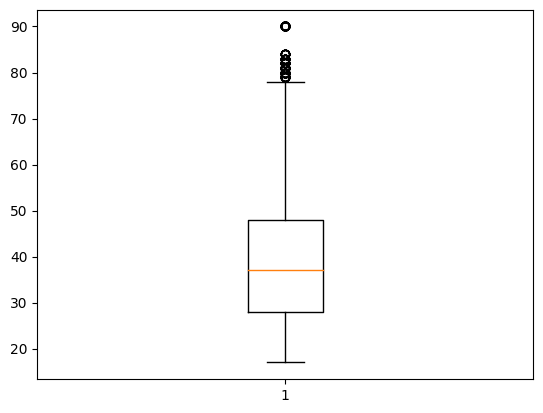

In [1010]:
import matplotlib.pyplot as plt
plt.boxplot(data["age"])
plt.show()

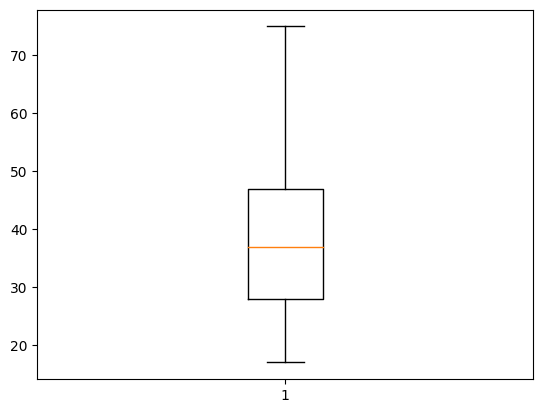

In [1011]:
data= data[(data["age"]<=75) & (data["age"]>=17)]
plt.boxplot(data["age"])
plt.show()

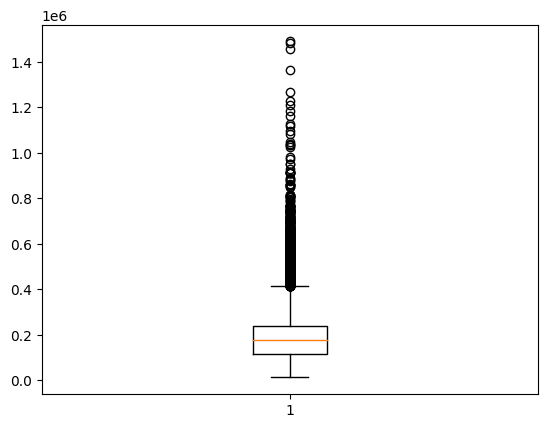

In [1012]:
plt.boxplot(data["fnlwgt"])
plt.show()

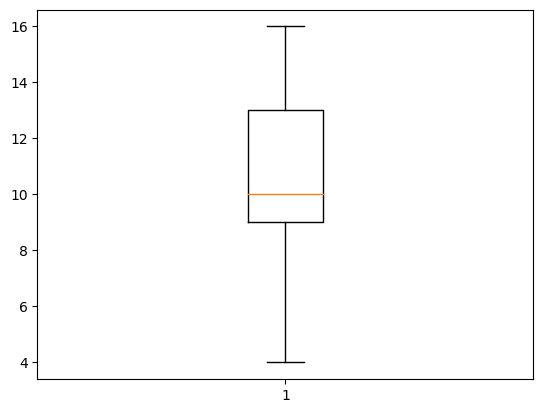

In [1013]:
plt.boxplot(data["educational-num"])
plt.show()

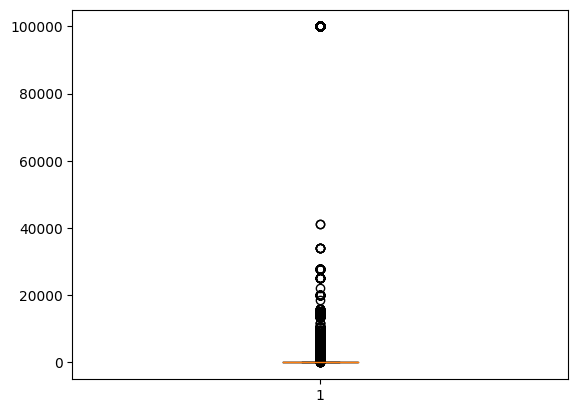

In [1014]:
plt.boxplot(data["capital-gain"])
plt.show()

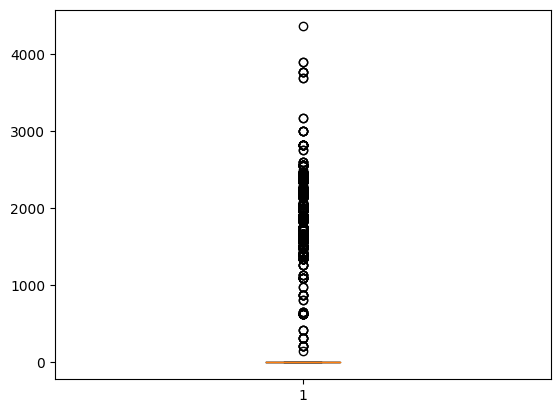

In [1015]:
plt.boxplot(data["capital-loss"])
plt.show()

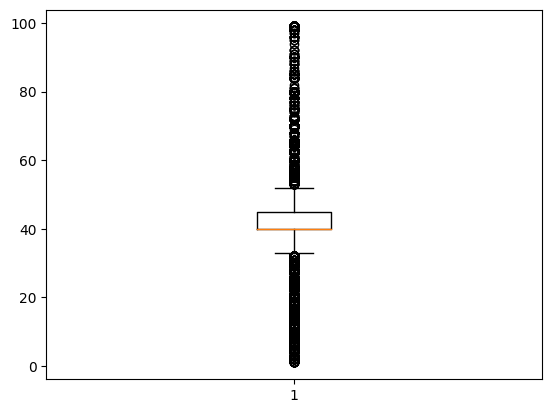

In [1016]:
plt.boxplot(data["hours-per-week"])
plt.show()

In [1017]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["workclass"] = encoder.fit_transform(data["workclass"])
data["marital-status"] = encoder.fit_transform(data["marital-status"])
data["occupation"] = encoder.fit_transform(data["occupation"])
data["relationship"] = encoder.fit_transform(data["relationship"])
data["race"] = encoder.fit_transform(data["race"])
data["gender"] = encoder.fit_transform(data["gender"])
data["native-country"] = encoder.fit_transform(data["native-country"])

C:\Users\Vidyadheesha M Pandurangi\AppData\Local\Temp\ipykernel_6980\390713059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["workclass"] = encoder.fit_transform(data["workclass"])
C:\Users\Vidyadheesha M Pandurangi\AppData\Local\Temp\ipykernel_6980\390713059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["marital-status"] = encoder.fit_transform(data["marital-status"])
C:\Users\Vidyadheesha M Pandurangi\AppData\Local\Temp\ipykernel_6980\390713059.py:5: SettingWithCopyWarning: 
A value 

In [1018]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,3,5,3,2,1,0,0,40,38,<=50K
1,38,3,89814,9,1,3,0,4,1,0,0,50,38,<=50K
2,28,1,336951,12,1,10,0,4,1,0,0,40,38,>50K
3,44,3,160323,10,1,5,0,2,1,7688,0,40,38,>50K
4,18,2,103497,10,3,7,3,4,0,0,0,30,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,1,12,5,4,0,0,0,38,38,<=50K
48838,40,3,154374,9,1,5,0,4,1,0,0,40,38,>50K
48839,58,3,151910,9,5,0,4,4,0,0,0,40,38,<=50K
48840,22,3,201490,9,3,0,3,4,1,0,0,20,38,<=50K


In [1019]:
data.shape

(47566, 14)

In [1020]:
x = data.drop(columns = ["income"])
y = data["income"]

In [1021]:
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,3,5,3,2,1,0,0,40,38
1,38,3,89814,9,1,3,0,4,1,0,0,50,38
2,28,1,336951,12,1,10,0,4,1,0,0,40,38
3,44,3,160323,10,1,5,0,2,1,7688,0,40,38
4,18,2,103497,10,3,7,3,4,0,0,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,1,12,5,4,0,0,0,38,38
48838,40,3,154374,9,1,5,0,4,1,0,0,40,38
48839,58,3,151910,9,5,0,4,4,0,0,0,40,38
48840,22,3,201490,9,3,0,3,4,1,0,0,20,38


In [1022]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 47566, dtype: object

In [1023]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer

In [1024]:
if not isinstance(x, pd.DataFrame):
    x = pd.DataFrame(x, columns=data.drop(columns=["income"]).columns)
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x.select_dtypes(include=['object']).columns.tolist()

In [1025]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [1026]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=43)

In [1027]:
xtest

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
29370,30,5,226535,4,1,3,0,4,1,0,0,40,24
34888,60,3,349898,9,5,6,1,4,0,0,0,44,38
42703,54,3,271160,11,5,2,1,4,0,0,0,40,38
26634,33,3,126414,13,1,6,5,4,0,0,0,40,26
37158,48,2,112860,6,1,7,5,2,0,0,0,35,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,57,0,47534,14,0,2,1,4,0,0,0,60,38
16286,37,3,284582,14,1,2,5,4,0,0,0,40,38
47314,55,3,132887,9,1,13,0,2,1,3411,0,40,21
5433,29,3,176137,9,0,0,4,4,0,0,0,40,38


In [1028]:
ytest

29370    <=50K
34888    <=50K
42703    <=50K
26634    <=50K
37158    <=50K
         ...  
4698      >50K
16286    <=50K
47314    <=50K
5433     <=50K
22387    <=50K
Name: income, Length: 9514, dtype: object

In [1029]:
xtrain

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
27884,35,3,108907,9,4,5,4,4,1,0,0,40,38
28979,26,3,120268,13,3,0,3,4,1,0,0,24,38
48218,22,3,239954,10,3,0,2,4,1,0,0,40,38
43881,39,3,108140,14,1,2,0,4,1,0,0,50,38
48651,53,5,137547,15,3,9,1,1,1,27828,0,40,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25906,34,1,188682,13,2,9,1,4,0,0,0,40,38
18950,49,3,23074,10,5,2,1,4,0,0,0,40,38
41848,25,3,132683,9,3,8,1,4,0,0,0,50,38
20316,34,5,320194,15,4,9,4,4,1,0,0,48,38


In [1030]:
ytrain

27884    <=50K
28979    <=50K
48218    <=50K
43881     >50K
48651     >50K
         ...  
25906    <=50K
18950     >50K
41848    <=50K
20316     >50K
14542     >50K
Name: income, Length: 38052, dtype: object

In [1031]:
data = data.drop(columns=['fnlwgt', 'educational-num', 'capital-gain', 'capital-loss'])
data = data.replace("?", "Others")

In [1032]:
from catboost import CatBoostClassifier
CBC = CatBoostClassifier()
CBC.fit(xtrain , ytrain)
predict_CBC = CBC.predict(xtest)
predict_CBC

Learning rate set to 0.048725
0:	learn: 0.6457456	total: 11.1ms	remaining: 11.1s
1:	learn: 0.6046942	total: 21.6ms	remaining: 10.8s
2:	learn: 0.5650198	total: 31.7ms	remaining: 10.5s
3:	learn: 0.5349492	total: 43ms	remaining: 10.7s
4:	learn: 0.5072453	total: 55.2ms	remaining: 11s
5:	learn: 0.4864134	total: 66.4ms	remaining: 11s
6:	learn: 0.4675414	total: 79.9ms	remaining: 11.3s
7:	learn: 0.4488736	total: 90.9ms	remaining: 11.3s
8:	learn: 0.4324741	total: 103ms	remaining: 11.4s
9:	learn: 0.4209810	total: 114ms	remaining: 11.3s
10:	learn: 0.4108828	total: 124ms	remaining: 11.1s
11:	learn: 0.4007027	total: 134ms	remaining: 11s
12:	learn: 0.3917920	total: 145ms	remaining: 11s
13:	learn: 0.3849894	total: 155ms	remaining: 10.9s
14:	learn: 0.3797642	total: 168ms	remaining: 11s
15:	learn: 0.3740043	total: 183ms	remaining: 11.2s
16:	learn: 0.3692690	total: 196ms	remaining: 11.3s
17:	learn: 0.3640932	total: 207ms	remaining: 11.3s
18:	learn: 0.3595823	total: 227ms	remaining: 11.7s
19:	learn: 0.35

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [1033]:
import lightgbm as lgb
LGB = lgb.LGBMClassifier()
LGB.fit(xtrain , ytrain)
predict_LGB = LGB.predict(xtest)
predict_LGB

[LightGBM] [Info] Number of positive: 9249, number of negative: 28803
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 38052, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.243062 -> initscore=-1.135964
[LightGBM] [Info] Start training from score -1.135964


array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [1034]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(xtrain , ytrain)
predict_QDA = QDA.predict(xtest)
predict_QDA

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [1035]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC.fit(xtrain , ytrain)
predict_ETC = ETC.predict(xtest)
predict_ETC

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [1036]:
models = {
   "CatBoost": CatBoostClassifier(verbose=0),
    "LightGBM": lgb.LGBMClassifier(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Extra Trees": ExtraTreesClassifier(),
}

In [1037]:
results = {}
pipelines = {}

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    pipe.fit(xtrain, ytrain)
    y_pred = pipe.predict(xtest)
    acc = accuracy_score(ytest, y_pred)
    
    results[name] = acc
    pipelines[name] = pipe

    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(ytest, y_pred))

CatBoost Accuracy: 0.8413
              precision    recall  f1-score   support

       <=50K       0.85      0.96      0.90      7192
        >50K       0.79      0.47      0.59      2322

    accuracy                           0.84      9514
   macro avg       0.82      0.72      0.75      9514
weighted avg       0.84      0.84      0.83      9514

[LightGBM] [Info] Number of positive: 9249, number of negative: 28803
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 38052, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.243062 -> initscore=-1.135964
[LightGBM] [Info] Start training from score -1.135964
LightGBM Accuracy: 0.8369
              precision    recall  f1-score   support

       <=50

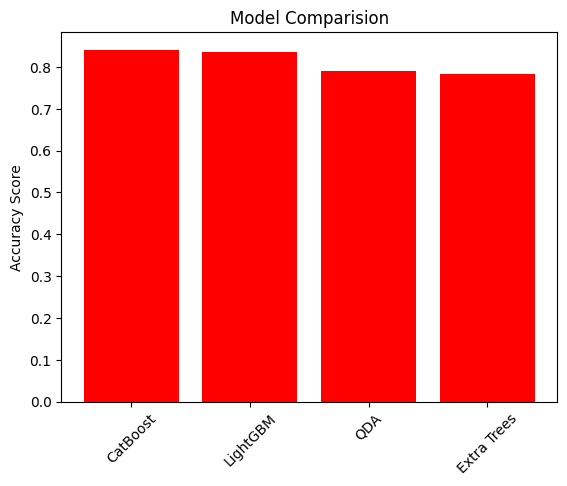

In [1038]:
import matplotlib.pyplot as plt
plt.bar(results.keys() , results.values() , color = "red")
plt.ylabel ("Accuracy Score")
plt.title("Model Comparision")
plt.xticks(rotation = 45)
plt.show()

In [1039]:
import joblib
best_model_name = max(results, key=results.get)
best_pipeline = pipelines[best_model_name]
print(f"Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")
joblib.dump(best_pipeline, "best_model.pkl")
print("Saved best pipeline (with preprocessing) as best_model.pkl")

Best model: CatBoost with accuracy 0.8413
Saved best pipeline (with preprocessing) as best_model.pkl


In [1108]:
%%writefile PayPredictor.py

import streamlit as st
import pandas as pd
import joblib

# Load trained model
model = joblib.load("best_model.pkl")

st.title("💼PayPredictor")
st.write("Enter the following details to predict whether the income is >50K or <=50K")

# Form input

age = st.slider("Age", 18, 90, 30)
workclass = st.selectbox("Workclass", ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Federal-gov', 'Others'])
education = st.selectbox("Education", ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Doctorate', 'Others'])
marital_status = st.selectbox("Marital Status", ['Never-married', 'Married-civ-spouse', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent'])
occupation = st.selectbox("Occupation", ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Others'])
relationship = st.selectbox("Relationship", ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'])
gender = st.radio("Gender", ['Male', 'Female'])
hours_per_week = st.slider("Hours per Week", 1, 100, 40)
native_country = st.selectbox("Native Country", ['United-States', 'India', 'Mexico', 'Philippines', 'Others'])

# Predict
if st.button("Predict Income Category"):
    input_df = pd.DataFrame([{
        'age': age,
        'workclass': workclass,
        'education': education,
        'marital-status': marital_status,
        'occupation': occupation,
        'relationship': relationship,
        'gender': gender,
        'hours-per-week': hours_per_week,
        'native-country': native_country,

        #Default values
        
        'capital-gain': 0,
        'capital-loss': 0,
        'fnlwgt': 1,
        'educational-num': 10
    }])
    
    prediction = model.predict(input_df)[0]
    st.success(f"Predicted Income Category: **{prediction}**")

Overwriting PayPredictor.py


In [ ]:
!streamlit run PayPredictor.py